In [1]:
from pathlib import Path

from pandas import DataFrame, read_csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results_path = Path("../../profiling/dining/2022-12-16_15-07.csv")

# Font size
sns.set(font_scale=1.3)

In [3]:
df = read_csv(results_path, index_col=0)
df.loc[df["Algorithm"] == "NAIVE", "Algorithm"] = "naive"
df.loc[df["Algorithm"] == "EMERSON_LEI", "Algorithm"] = "Emerson Lei" 

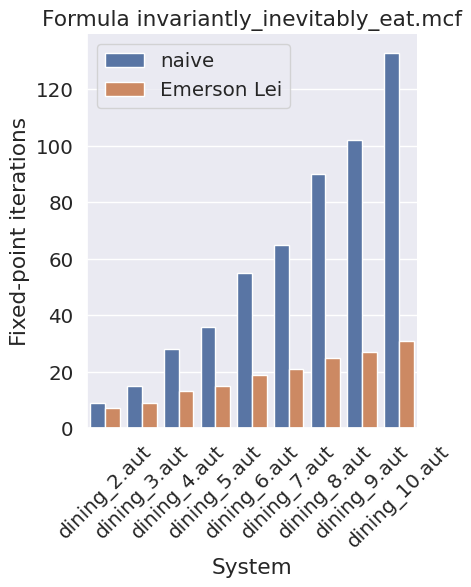

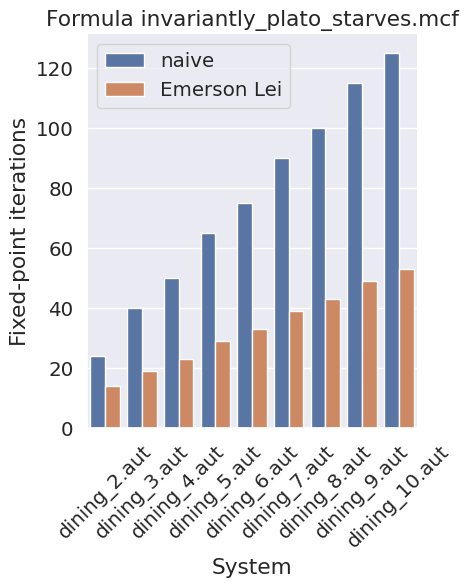

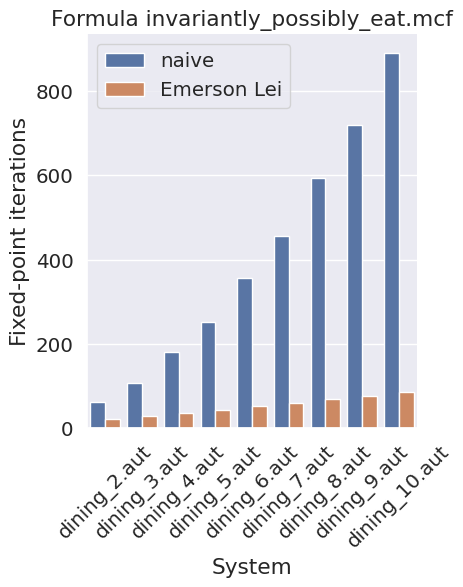

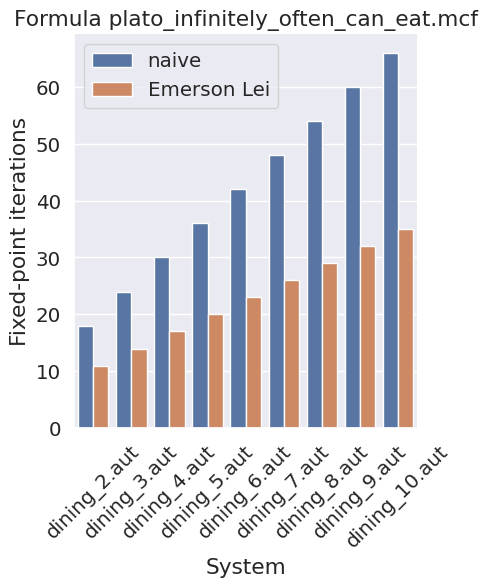

In [4]:
# fixed point iterations
for formula_name in df["Formula"].unique():
    plot = sns.catplot(data=df[df["Formula"] == formula_name], kind="bar",
                    x="System", y="ifp", hue="Algorithm", legend=False)
    plot.set_xticklabels(rotation=45)
    plot.set(ylabel="Fixed-point iterations")
    plot.set(title="Formula {formula}".format(formula=formula_name))
    plt.legend(loc="upper left")
    
    plot.savefig("{formula}_ifp.svg".format(formula=formula_name), format="svg")

In [5]:
# total runtime
for formula_name in df["Formula"].unique():
    plot = sns.catplot(data=df[df["Formula"] == formula_name], kind="bar",
                    x="System", y="ttot", hue="Algorithm", legend=False)
    plot.set_xticklabels(rotation=45)
    plot.set(yscale='log', title="Formula {formula}".format(formula=formula_name),
            ylabel="Total runtime in seconds")
    plt.legend(loc="upper left")
    
    # save figure
    plot.savefig("{formula}_ttot.svg".format(formula=formula_name), format="svg")